## Carregando as Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# 1. Carregando os dados

In [2]:
# Carregando o dataset
cardio = pd.read_csv('cardio_train.csv', sep=';')

# 2. Tratamento dos dados

In [3]:
# Visulizando as primeiras linhas
cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
# visulando as últimas linhas do dataset
cardio.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [5]:
# Verificando a forma dos dados
cardio.shape

(70000, 13)

In [6]:
# Verificando valores nulos
cardio.isnull().values.any()

False

In [7]:
# Verificando os tipos dos dados
cardio.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [4]:
# Transformando a coluna 'age' para idade em anos
cardio['age'] = round(cardio['age'] / 365)

# Modificando a variável 'height'. Dividindo os valores por 100 para retornar a altura em metros
cardio['height'] = cardio['height'] / 100


In [5]:
# Criando a variável 'imc' para calcular o índice de massa corporal
cardio['imc'] = cardio['weight'] / cardio['height'] **2

In [6]:
# Classificando o imc
for i in range(len(cardio)):
  if cardio.loc[i, 'imc'] < 16.00:
    cardio.loc[i, 'classificacao_imc'] = 'magreza grau 3'
  elif (cardio.loc[i, 'imc'] >= 16.00) and (cardio.loc[i, 'imc'] <= 16.99):
    cardio.loc[i, 'classificacao_imc'] = 'magreza grau 2'
  elif (cardio.loc[i, 'imc'] >= 17.00) and (cardio.loc[i, 'imc'] <= 18.40):
    cardio.loc[i, 'classificacao_imc'] = 'magreza grau 1'
  elif (cardio.loc[i, 'imc'] >= 18.50) and (cardio.loc[i, 'imc'] <= 24.99):
    cardio.loc[i, 'classificacao_imc'] = 'adequado'
  elif (cardio.loc[i, 'imc'] >= 25.00) and (cardio.loc[i, 'imc'] <= 29.99):
    cardio.loc[i, 'classificacao_imc'] = 'pre-obeso 1'
  elif (cardio.loc[i, 'imc'] >= 30.00) <= (cardio.loc[i, 'imc'] <= 34.99):
    cardio.loc[i, 'classificacao_imc'] = 'obesidade grau 1'
  elif (cardio.loc[i, 'imc'] >= 35.00) and  (cardio.loc[i, 'imc'] <= 39.99):
    cardio.loc[i, 'classificacao_imc'] = 'obesidade grau 2'
  else:
      cardio.loc[i, 'classificacao_imc'] = 'obesidade grau 3'

In [7]:
# Organizando a ordem das colunas 
cardio = cardio[['age', 'gender', 'height', 'weight', 'imc', 'classificacao_imc', 
       'ap_hi','ap_lo','cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']]
# Verificando a alteração
cardio.head()

,age,gender,height,weight,imc,classificacao_imc,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,2,1.68,62.0,21.967120,adequado,110,80,1,1,0,0,1,0
1,55.0,1,1.56,85.0,34.927679,obesidade grau 1,140,90,3,1,0,0,1,1
2,52.0,1,1.65,64.0,23.507805,adequado,130,70,3,1,0,0,0,1
3,48.0,2,1.69,82.0,28.710479,pre-obeso 1,150,100,1,1,0,0,1,1
4,48.0,1,1.56,56.0,23.011177,adequado,100,60,1,1,0,0,0,0


### 2.1 Salvando o dataframe para criação do app com o Streamlit
cardio.to_csv("cardio_app.csv")

In [17]:
cardio_app2 = cardio[['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']]

In [19]:
cardio_app2.to_csv("cardio_app2.csv", index = 0)
cardio_app2.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,2,1.68,62.0,110,80,1,1,0,0,1,0
1,55.0,1,1.56,85.0,140,90,3,1,0,0,1,1
2,52.0,1,1.65,64.0,130,70,3,1,0,0,0,1
3,48.0,2,1.69,82.0,150,100,1,1,0,0,1,1
4,48.0,1,1.56,56.0,100,60,1,1,0,0,0,0


# 3. Análise Exploratória

In [12]:
# Verificando a ocorrencia de casos positivos e negativos
cardio_true = len(cardio.loc[cardio['cardio'] == 1])
cardio_false = len(cardio.loc[cardio['cardio'] == 0])

print('Número de casos positivos: {0} ({1:2.2f}%)'.format
      (cardio_true, (cardio_true / (cardio_true + cardio_false)) * 100))

print('Número de casos negativos: {0} ({1:2.2f}%)'.format
      (cardio_false, (cardio_false / (cardio_false + cardio_true)) * 100))

Número de casos positivos: 34979 (49.97%)
Número de casos negativos: 35021 (50.03%)


In [13]:
# Verificando a distribuição de gêneros nos dados
cardio_gender1 = len(cardio.loc[cardio['gender'] == 1])
cardio_gender2 = len(cardio.loc[cardio['gender'] == 2])

print('Número de gênero feminino: {0} ({1:2.2f}%)'.format(cardio_gender1,
                                                          (cardio_gender1 / (cardio_gender1 + cardio_gender2)) * 100))
print('Número de gênero masculino: {0} ({1:2.2f}%)'.format(cardio_gender2,
                                                           (cardio_gender2 / (cardio_gender2 + cardio_gender1)) * 100))

Número de gênero feminino: 45530 (65.04%)
Número de gênero masculino: 24470 (34.96%)


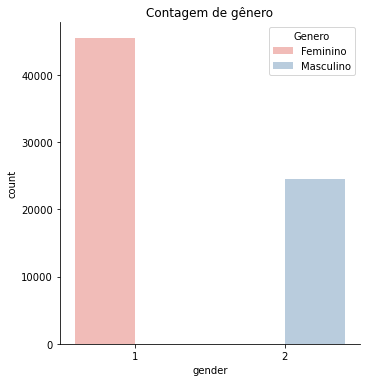

In [49]:
# Contagem de genero 
sns.catplot(x="gender", kind="count", hue = 'gender', palette="Pastel1", data = cardio);
plt.legend(labels=["Feminino", "Masculino"], title = "Genero", loc=1);
plt.title('Contagem de gênero')
plt.show()

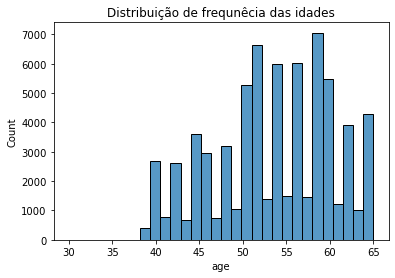

In [50]:
# Histograma da variavel idade
sns.histplot(cardio['age'],  bins = 30);
plt.title('Distribuição de frequnêcia das idades')
plt.show()

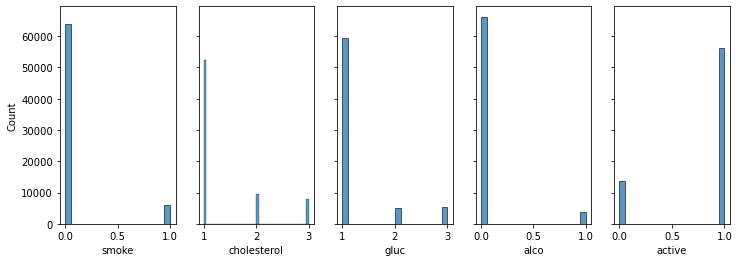

In [16]:
# Histograma das variaveis discretas: smoke, cholesterol, gluc, active e alco
fig, axes = plt.subplots(1,5, figsize = (12,4), sharey=True)

# smoke
sns.histplot(ax=axes[0], data=cardio['smoke']);

# cholesterol
sns.histplot(ax=axes[1], data=cardio['cholesterol']);

# gluc
sns.histplot(ax=axes[2], data=cardio['gluc']);

# alco
sns.histplot(ax=axes[3], data=cardio['alco']);

# active
sns.histplot(ax=axes[4], data=cardio['active']);

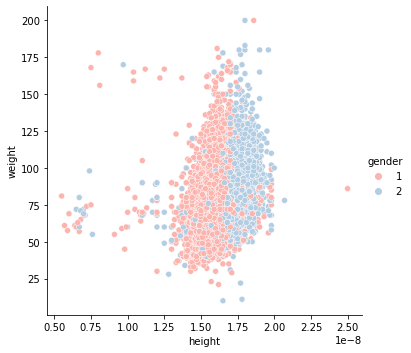

In [27]:
# Distribuição da altura e peso dos generos
sns.relplot(x='height', y='weight', hue = 'gender',palette="Pastel1", data = cardio);

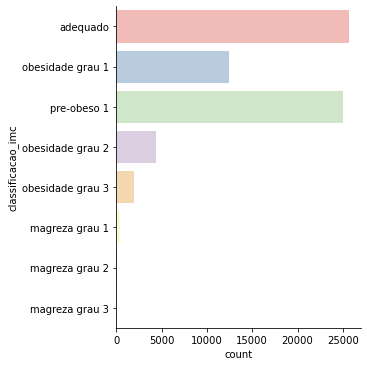

In [17]:
# Visualizando a classificacao do imc 

#g = sns.catplot(y="classificacao_imc", kind = 'count', palette="Pastel1", data = cardio);
#g.set_xticklabels(rotation=30);
sns.catplot(y="classificacao_imc", kind = 'count', palette="Pastel1", data = cardio);

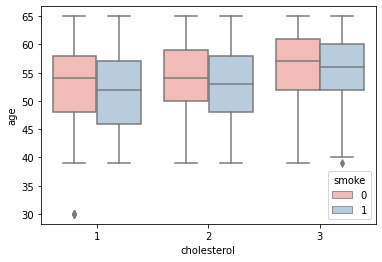

In [18]:
# Boxplot com as variaveis idade e colesterol em função dos fumantes.
sns.boxplot(data = cardio, y = 'age', x='cholesterol', hue = 'smoke', palette = 'Pastel1');

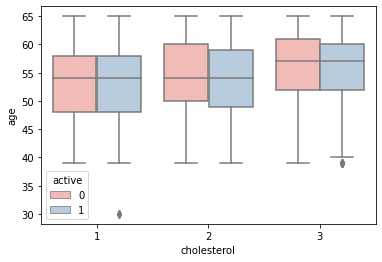

In [19]:
# Boxplot com as variaveis idade e colesterol em função da atividade fisica.
sns.boxplot(data = cardio, y = 'age', x = 'cholesterol', hue = 'active', palette = 'Pastel1');

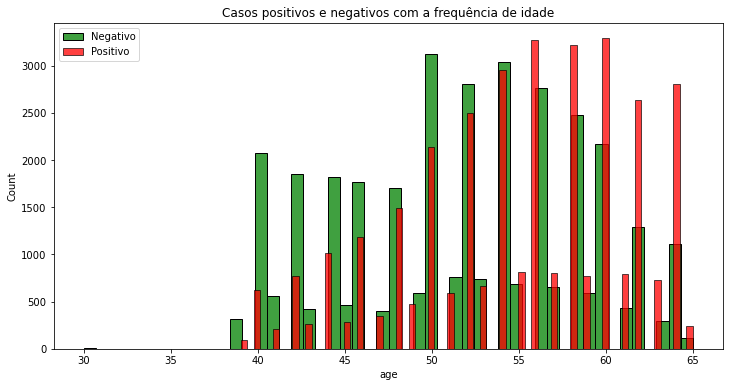

In [20]:
# Verificando a orrencias de casos em relação a idade
cardio_false = cardio.loc[cardio['cardio'] == 0]
cardio_true =  cardio.loc[cardio['cardio'] == 1]

# Visulizando o histograma
plt.figure(figsize=(12,6))
sns.histplot(cardio_false['age'], bins = 50, color = 'green', label='Negativo')
sns.histplot(cardio_true['age'], bins = 70, color = 'red', label='Positivo')
plt.legend(loc='upper left')
plt.title('Casos positivos e negativos com a frequência de idade')
plt.show()

In [21]:
# Resumo estatístico de algumas variaveis
cardio[['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'imc']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,70000.0,53.338686,6.765294,30.000000,48.000000,54.000000,58.000000,65.000000
height,70000.0,1.643592,0.082101,0.550000,1.590000,1.650000,1.700000,2.500000
weight,70000.0,74.205690,14.395757,10.000000,65.000000,72.000000,82.000000,200.000000
ap_hi,70000.0,128.817286,154.011419,-150.000000,120.000000,120.000000,140.000000,16020.000000
ap_lo,70000.0,96.630414,188.472530,-70.000000,80.000000,80.000000,90.000000,11000.000000
imc,70000.0,27.556513,6.091511,3.471784,23.875115,26.374068,30.222222,298.666667


In [33]:
# matriz de Correlação entre as variáveis
cardio.corr()

,id,age,gender,height,weight,imc,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,NaN,0.003502,-0.003038,-0.001830,-0.001377,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799
age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,0.003502,NaN,1.000000,0.499033,0.155406,-0.096529,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.003038,NaN,0.499033,1.000000,0.290968,-0.290642,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,-0.001830,NaN,0.155406,0.290968,1.000000,0.762009,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
imc,-0.001377,NaN,-0.096529,-0.290642,0.762009,1.000000,0.146270,0.101390,-0.027215,0.014394,-0.014261,0.165632
cholesterol,0.006106,NaN,-0.035821,-0.050226,0.141768,0.146270,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.002467,NaN,-0.020491,-0.018595,0.106857,0.101390,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.003699,NaN,0.338135,0.187989,0.067780,-0.027215,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486
alco,0.001210,NaN,0.170966,0.094419,0.067113,0.014394,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330


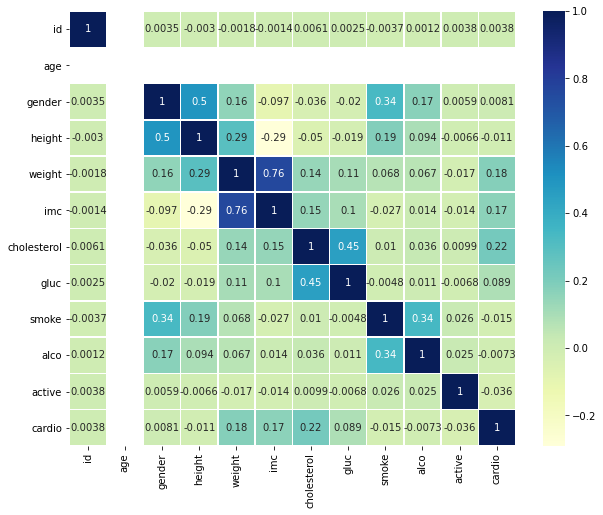

In [34]:
# Visualizando a matriz em um gráfico (heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(cardio.corr(), linewidths=.5, annot = True, cmap="YlGnBu")
plt.show()

In [35]:
# Verificando a correlação das variáveis em relação a variável 'cardio'(target)
cardio.corr()['cardio']

id             0.003799
age                 NaN
gender         0.008109
height        -0.010821
weight         0.181660
imc            0.165632
cholesterol    0.221147
gluc           0.089307
smoke         -0.015486
alco          -0.007330
active        -0.035653
cardio         1.000000
Name: cardio, dtype: float64

# 4. Pré-Processamento KNN

In [12]:
# Separando os atributos da variável target
cardio_atrib = [c for c in cardio.columns if c not in ['id','classificacao_imc', 'cardio']]
cardio_atrib_prev = ['cardio']

In [13]:
# Atribuindo os valores as variáveis x e y
x = cardio[cardio_atrib].values
y = cardio[cardio_atrib_prev].values

In [14]:
print(x)
print(y)

[[50.    2.    1.68 ...  0.    0.    1.  ]
 [55.    1.    1.56 ...  0.    0.    1.  ]
 [52.    1.    1.65 ...  0.    0.    0.  ]
 ...
 [52.    2.    1.83 ...  0.    1.    0.  ]
 [61.    1.    1.63 ...  0.    0.    0.  ]
 [56.    1.    1.7  ...  0.    0.    1.  ]]
[[0]
 [1]
 [1]
 ...
 [1]
 [1]
 [0]]


In [15]:
# Separando os dados de treino e teste / taxa de split de 0.30
x_treino, x_teste, y_treino, y_teste = sklearn.model_selection.train_test_split(x, y, test_size=0.30)

In [16]:
# Normalizando os dados pela média

# Calculo da média nos dados de treino
x_norm = np.mean(x_treino, axis = 0)

# Normalização dos dados de treino e teste
x_treino_norm = x_treino - x_norm
x_teste_norm = x_teste - x_norm  

# 4.1 KNeighborsClassifier KNN

In [17]:
# Criando o modelo
modelov1 = sklearn.neighbors.KNeighborsClassifier()

In [18]:
# Treinando o modelo
modelov1.fit(x_treino_norm, y_treino.ravel())

KNeighborsClassifier()

In [19]:
# Testtando o modelo
modelov1_predict = modelov1.predict(x_teste_norm)

In [20]:
# Criando a confusion matrix
print('Confusion Matrix')

print('{0}'.format(metrics.confusion_matrix(y_teste, modelov1_predict, labels = [1, 0])))
print("")

print('Classification Report')
print(metrics.classification_report(y_teste, modelov1_predict, labels = [1, 0]))

Confusion Matrix
[[7089 3485]
 [3039 7387]]

Classification Report
              precision    recall  f1-score   support

           1       0.70      0.67      0.68     10574
           0       0.68      0.71      0.69     10426

    accuracy                           0.69     21000
   macro avg       0.69      0.69      0.69     21000
weighted avg       0.69      0.69      0.69     21000



### 4.2 KNN Grid Search

In [21]:
# Criando o modelo
modelov2 = sklearn.neighbors.KNeighborsClassifier()

In [22]:
# Definindo os paramentros
k = np.arange(11) + 1
parametros = {'n_neighbors': k}

In [23]:
# Grid Search para Cross Validation com o melhor valor de K
modelo_KNN = sklearn.model_selection.GridSearchCV(modelov2, parametros, cv = 10)

In [24]:
# Visualizando os parâmetros 
modelo_KNN.get_params()

{'cv': 10,
 'error_score': nan,
 'estimator__algorithm': 'auto',
 'estimator__leaf_size': 30,
 'estimator__metric': 'minkowski',
 'estimator__metric_params': None,
 'estimator__n_jobs': None,
 'estimator__n_neighbors': 5,
 'estimator__p': 2,
 'estimator__weights': 'uniform',
 'estimator': KNeighborsClassifier(),
 'n_jobs': None,
 'param_grid': {'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [25]:
# Treinando o modelo
modelo_KNN.fit(x_treino_norm, y_treino.ravel())

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])})

In [26]:
# Testando o modelo
modelov2_predict = modelo_KNN.predict(x_teste_norm)

In [27]:
# Criando a confusion matrix
print('Confusion Matrix')

print('{0}'.format(metrics.confusion_matrix(y_teste, modelov2_predict, labels = [1, 0])))
print("")

print('Classification Report')
print(metrics.classification_report(y_teste, modelov2_predict, labels = [1, 0]))

Confusion Matrix
[[7141 3433]
 [2691 7735]]

Classification Report
              precision    recall  f1-score   support

           1       0.73      0.68      0.70     10574
           0       0.69      0.74      0.72     10426

    accuracy                           0.71     21000
   macro avg       0.71      0.71      0.71     21000
weighted avg       0.71      0.71      0.71     21000



#### KNN accuracy: 0.71

# 5. Pre-Processamento Random Forest

In [39]:
# Separando os atributos da variável target
cardio_atrib = [c for c in cardio.columns if c not in ['id','imc', 'classificacao_imc', 'cardio']]
cardio_atrib_prev = ['cardio']

In [40]:
# Atribuindo os valores de x e y
X = cardio[cardio_atrib]
Y = cardio[cardio_atrib_prev]

In [41]:
x_vetor = cardio[cardio_atrib].values
y_vetor = cardio[cardio_atrib_prev].values

In [42]:
x_vetor

array([[50.  ,  2.  ,  1.68, ...,  0.  ,  0.  ,  1.  ],
       [55.  ,  1.  ,  1.56, ...,  0.  ,  0.  ,  1.  ],
       [52.  ,  1.  ,  1.65, ...,  0.  ,  0.  ,  0.  ],
       ...,
       [52.  ,  2.  ,  1.83, ...,  0.  ,  1.  ,  0.  ],
       [61.  ,  1.  ,  1.63, ...,  0.  ,  0.  ,  0.  ],
       [56.  ,  1.  ,  1.7 , ...,  0.  ,  0.  ,  1.  ]])

In [43]:
X

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,50.0,2,1.68,62.0,110,80,1,1,0,0,1
1,55.0,1,1.56,85.0,140,90,3,1,0,0,1
2,52.0,1,1.65,64.0,130,70,3,1,0,0,0
3,48.0,2,1.69,82.0,150,100,1,1,0,0,1
4,48.0,1,1.56,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69995,53.0,2,1.68,76.0,120,80,1,1,1,0,1
69996,62.0,1,1.58,126.0,140,90,2,2,0,0,1
69997,52.0,2,1.83,105.0,180,90,3,1,0,1,0
69998,61.0,1,1.63,72.0,135,80,1,2,0,0,0


In [44]:
# Separando os dados de treino e teste / taxa de split de 0.30
X_treino, X_teste, Y_treino, Y_teste = sklearn.model_selection.train_test_split(X, Y, test_size=0.30)

In [45]:
# Separando os dados de treino e teste / taxa de split de 0.30
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x_vetor, y_vetor, test_size=0.30)

# 5.1 Random Forest Classifier

In [46]:
# Criando o modelo 
modelo_rfc = RandomForestClassifier()

In [47]:
# Treinando o modelo
modelo_rfc.fit(X_treino, Y_treino)

<ipython-input-47-ee28c50e0bd5>:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier()

In [48]:
# Avaliação do modelo com os dados de teste
rfc_predict = modelo_rfc.predict(X_teste)

In [49]:
# Verificando a acuracia do modelo
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, rfc_predict)))
print()

Exatidão (Accuracy): 0.7025



In [50]:
# Resultados do modelo: Confusion Matrix e Classification Report
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(Y_teste, rfc_predict, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(Y_teste, rfc_predict, labels = [1, 0]))

Confusion Matrix
[[7257 3227]
 [3021 7495]]

Classification Report
              precision    recall  f1-score   support

           1       0.71      0.69      0.70     10484
           0       0.70      0.71      0.71     10516

    accuracy                           0.70     21000
   macro avg       0.70      0.70      0.70     21000
weighted avg       0.70      0.70      0.70     21000



In [51]:
# Criando o modelo 
modelo_clf = RandomForestClassifier()

In [52]:
# Treinando o modelo com dados vetorizados
modelo_clf.fit(x_train, y_train.ravel())

RandomForestClassifier()

In [53]:
# Predição
clf_predict = modelo_clf.predict(x_test)

In [54]:
# Verificando a acuracia do modelo
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(y_test, clf_predict)))
print()

Exatidão (Accuracy): 0.7075



In [55]:
# Resultados do modelo: Confusion Matrix e Classification Report
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(y_test, clf_predict, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, clf_predict, labels = [1, 0]))

Confusion Matrix
[[7448 3061]
 [3081 7410]]

Classification Report
              precision    recall  f1-score   support

           1       0.71      0.71      0.71     10509
           0       0.71      0.71      0.71     10491

    accuracy                           0.71     21000
   macro avg       0.71      0.71      0.71     21000
weighted avg       0.71      0.71      0.71     21000



In [56]:
import plotly.express as px
def impPlot(imp, name):
    figure = px.bar(imp,
                    x=imp.values,
                    y=imp.keys(), labels = {'x':'Importance Value', 'index':'Columns'},
                    text=np.round(imp.values, 2),
                    title=name + ' Feature Selection Plot',
                    width=900, height=600)
    figure.update_layout({
        'plot_bgcolor': 'rgba(0, 0, 0, 0)',
        'paper_bgcolor': 'rgba(0, 0, 0, 0)',
    })
    st.plotly_chart(figure)

In [57]:
feat_importances = pd.Series(modelo_rfc.feature_importances_, index=X.columns).sort_values(ascending=False)

In [58]:
px.bar(feat_importances, barmode='stack', title='Feature Importance')

#### Random Forest accuracy = 0.71

### 5.2 Cross Validation Random Forest

In [42]:
scores = cross_val_score(modelo_rfc,X, Y, cv = 5, scoring = 'accuracy')

C:\Users\saulm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\saulm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\saulm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\saulm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

In [35]:
print(scores)

[0.70792857 0.71385714 0.71078571 0.712      0.704     ]


In [43]:
print(scores.mean())

0.7103714285714287


#### Cross Validation Random Forest Accuracy: 0.71

# 6. Salvando o modelo

In [59]:
import pickle

In [60]:
clf = RandomForestClassifier()

In [61]:
clf.fit(X, Y)

<ipython-input-61-bb7a7515ddfc>:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier()

In [62]:
import pickle
pickle.dump(clf, open('cardio_clf.pkl', 'wb'))

In [63]:
pickle.dump(modelo_rfc, open('model_randomforest.pkl', 'wb'))